# Introduction

The goal of this project is to understand the conservation status of endangered species in National Parks by discovering the underlying pattern.

We will scope, process, analyze, plot the data and try to explain the phenomenon we observed.

Here are the questions we hope to answer via this project:
- What is the distribution of conservation status for species and category?
- Which cateogry of species has more protected species?
- Which National Park has more protected species?
- What are the species that can potentially be labelled as endangered species in the future?

**Data source:**

The data we imported is provided by [Codecademy.com](https://www.codecademy.com).

## Scoping

The scoping section will be segmented into four sections: goal, action, data, and analysis 

### Goal
The goal of the current project is to understand the pattern of endangered species in National Parks by answing the followin questions:
- What is the distribution of conservation status for species and category?
- Which category has more protected species? Is there any significant difference?
- Which National Park has more protected species observed in the last 7 days? Is there any significant difference?
- What are the species that potentially needs protection in the future?

### Action
We will analyze exising data provided by Codecademy. Primarily, python would be the code for analysis. 

### Data
There are two csv files given: 
- `observations`: the observation of species with location.
- `species_info`: the basic information of species.

### Analysis
Descriptive analysis, inferential analysis, and data visualisation will be employed to answer the aforementioned questions.

## Import Modules

In [216]:
import pandas as pd
import os
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from IPython.display import display, HTML

## Load Files
`observations.csv` and `species_info.csv` will be loaded via pandas as DataFrame, named as `observations` and `species_info`, respectively.

### observations
The `observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name**: The scientific name of each species
- **park_name**: The name of the National Park
- **observations**: The number of observations in the past 7 days

In [217]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### species_info
The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:

- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The conservation status of each species

In [218]:
species_info = pd.read_csv('species_info.csv')
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Data Charateristics

In [219]:
print(f'observations shape:{observations.shape}')
print(f'species_info:shape:{species_info.shape}')

observations shape:(23296, 3)
species_info:shape:(5824, 4)


### SQLite3 set up

In [220]:
conn=sqlite3.connect('mytable.db')
observations.to_sql('observations',conn,index=False,if_exists='replace')
species_info.to_sql('species_info',conn,index=False,if_exists='replace')

5824

## Data Exploration
The main purpose of this section is to get a rough idea of the data we have.

### Number of species observed and national parks investigated in `observations`

In [221]:
print(f'species observed:{len(pd.unique(observations.scientific_name))}') 
print(f'number of national park:{len(pd.unique(observations.park_name))}') 

species observed:5541
number of national park:4


### Total number of observation record in the last 7 days in `observations`

In [222]:
print(f'Total number of observation record:{observations.observations.sum()}')

Total number of observation record:3314739


### Number of species and category in `species_info`

In [583]:
display(species_info.groupby('category')['scientific_name'].nunique().sort_values(ascending=False))
print(f'number of species: {species_info.scientific_name.nunique()}')
print(f'number of category: {species_info.category.nunique()}')

category
Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                176
Fish                  125
Amphibian              79
Reptile                78
Name: scientific_name, dtype: int64

number of species: 5541
number of category: 7


### Number of species in conservation vs not from  `species_info`

In [581]:
num_of_con=species_info[species_info['conservation_status']!='No Concern']['scientific_name'].nunique()
num_of_non_con=species_info[species_info['conservation_status']=='No Concern']['scientific_name'].nunique()
print(f'number of species in conservation:{num_of_con}')
print(f'number of species not in conservation:{num_of_non_con}')

number of species in conservation:179
number of species not in conservation:5363


## Analysis
### 1) Distribution of Conservation Status
#### 1.1) The number of species in each conservation status

In [224]:
# replace NaN with 'No Concern' in order to do calculate number of species of this conservation status
species_info['conservation_status']=species_info['conservation_status'].fillna('No Concern',inplace=False)
conserve_dis=species_info.groupby('conservation_status')['scientific_name'].nunique()
conserve_dis_df=pd.DataFrame({'number_of_species': conserve_dis}).reset_index()
conserve_dis_df_1=conserve_dis_df.iloc[[0,1,3,4],:]

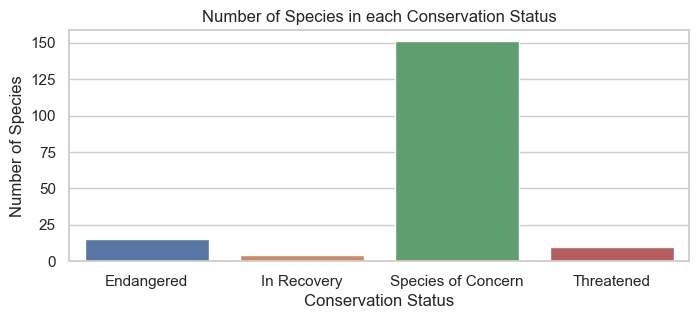

In [557]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
fig1=plt.figure(figsize=(8,3))
sns.barplot(data=conserve_dis_df_1, x='conservation_status',y='number_of_species')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.title('Number of Species in each Conservation Status')
plt.show()

In [249]:
display(species_info.groupby(['conservation_status','category'])['scientific_name'].nunique())

conservation_status  category         
Endangered           Amphibian               1
                     Bird                    4
                     Fish                    3
                     Mammal                  6
                     Vascular Plant          1
In Recovery          Bird                    3
                     Mammal                  1
No Concern           Amphibian              72
                     Bird                  413
                     Fish                  115
                     Mammal                146
                     Nonvascular Plant     328
                     Reptile                73
                     Vascular Plant       4216
Species of Concern   Amphibian               4
                     Bird                   68
                     Fish                    4
                     Mammal                 22
                     Nonvascular Plant       5
                     Reptile                 5
                     

- **The conservation status of species of concern has the highest number of species, which are mainly birds, vascular plants and mammals.**
- **Mammal is the category which has the most endangered species of all categories.**

#### 1.2) The number of species in each category and its conservation status

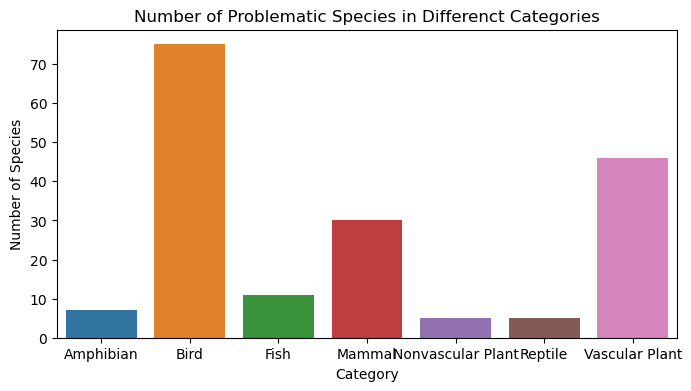

In [227]:
category_dis_df=pd.read_sql(
"""
SELECT category, count(DISTINCT(scientific_name)) AS 'number of species'
FROM species_info
WHERE conservation_status !='No Concern'
GROUP BY category
""",conn)

fig2=plt.figure(figsize=(8,4))
sns.barplot(x='category',y='number of species',data=category_dis_df)
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.title('Number of Problematic Species in Differenct Categories')
plt.show()

In [247]:
cat_conserve=species_info.groupby(['category','conservation_status'])['scientific_name'].nunique().reset_index(name='number_of_species')
cat_conserve_pivot=cat_conserve.pivot(index='category',columns='conservation_status', values='number_of_species').reset_index()
cat_conserve_pivot['ratio_of_no_concern']=round(cat_conserve_pivot['No Concern']/cat_conserve_pivot.sum(axis=1),2)
display(cat_conserve_pivot)

/var/folders/md/hbrjvx4s3nb147_zj3mhjbth0000gn/T/ipykernel_1196/2769186068.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cat_conserve_pivot['ratio_of_no_concern']=round(cat_conserve_pivot['No Concern']/cat_conserve_pivot.sum(axis=1),2)


conservation_status,category,Endangered,In Recovery,No Concern,Species of Concern,Threatened,ratio_of_no_concern
0,Amphibian,1.0,NaN,72.0,4.0,2.0,0.91
1,Bird,4.0,3.0,413.0,68.0,NaN,0.85
2,Fish,3.0,NaN,115.0,4.0,4.0,0.91
3,Mammal,6.0,1.0,146.0,22.0,2.0,0.82
4,Nonvascular Plant,NaN,NaN,328.0,5.0,NaN,0.98
5,Reptile,NaN,NaN,73.0,5.0,NaN,0.94
6,Vascular Plant,1.0,NaN,4216.0,43.0,2.0,0.99


- **The bird category has the highest number of species that require conservational assistance, with most number of species (n=68) labelled as "species of concern". Followed by vascular plants, which has 43 species labelled as species of concern.**
- **Despite ranked second in total number of problematic species, the vascular plants has the highest ratio of healthy species, whereas mammals are the category that has the least ratio of species that requires no concern.**

### 2. Difference of Conservation Status among Categories

#### One crucial question to answer is that whether different categories have significant different number of species that required protection. To answer that, we will run chi-square test in order to understand significant difference between two categories.

In [229]:
#data preparation
category_dis_df.columns=['category','sum_protection']
category_dis_df['no_concern']=cat_conserve_pivot['No Concern'].values

Let's visualize the the ratio of protected species in each category by plotting it.

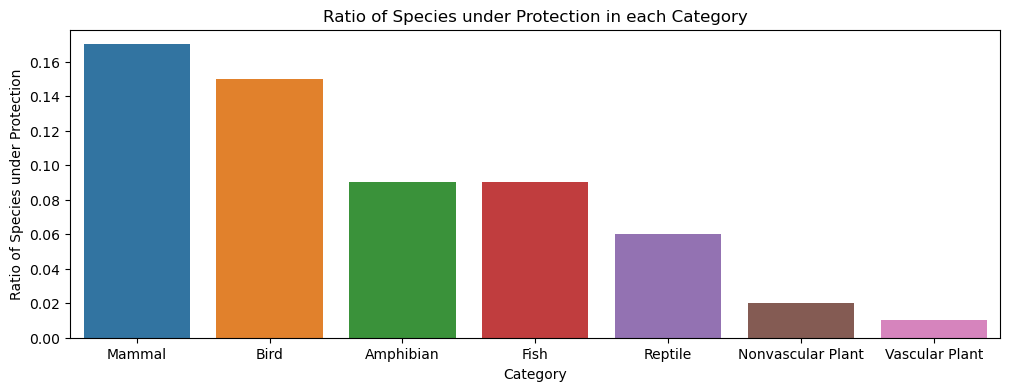

In [422]:
fig3= plt.figure(figsize=(12,4))
sns.barplot(x='category',y='ratio_of_protection',data=category_dis_df)
plt.xlabel('Category')
plt.ylabel('Ratio of Species under Protection')
plt.title('Ratio of Species under Protection in each Category')
plt.show()

As we can see in the plot, huge difference in ratio exist. Although it seems significant, it's better to test it out via Chi-square test.

In [230]:
cat_contingency=pd.DataFrame(category_dis_df[['sum_protection','no_concern']])
chi2,p_value,_,_ = chi2_contingency(cat_contingency)
print(f'Chi-square value: {chi2}')
print(f'P-value: {p_value}')

Chi-square value: 426.52931383200115
P-value: 5.5108280473137505e-89


The p-value is apparently smaller than 0.05, indicating there is a significant difference. The following section would find out which pair of category has the significant difference.

In [584]:
# perform pairwise chi-square tests
category_dis_df['ratio_of_protection']=category_dis_df['sum_protection']/category_dis_df.sum(axis=1)
category_dis_df=category_dis_df.sort_values('ratio_of_protection',ascending=False).reset_index(drop=True)
categories=category_dis_df['category']

for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        contingency_table_pairwise = category_dis_df[['sum_protection', 'no_concern']].loc[[i, j]]
        chi2, p, _, _ = chi2_contingency(contingency_table_pairwise)
        
        if p<0.05:
            print(f"Chi-square value for {categories[i]} vs {categories[j]}: {chi2}")
            print(f"P-value: {p}")
    

Chi-square value for Mammal vs Reptile: 4.289183096203645
P-value: 0.03835559022969898
Chi-square value for Mammal vs Nonvascular Plant: 41.0526001992972
P-value: 1.481868915759314e-10
Chi-square value for Mammal vs Vascular Plant: 246.5870424874456
P-value: 1.4405067309854046e-55
Chi-square value for Bird vs Nonvascular Plant: 41.717457869992714
P-value: 1.0546306904975004e-10
Chi-square value for Bird vs Vascular Plant: 354.42332680820607
P-value: 4.612268031690143e-79
Chi-square value for Amphibian vs Nonvascular Plant: 9.765103711306242
P-value: 0.001778554820715609
Chi-square value for Amphibian vs Vascular Plant: 32.7572979770742
P-value: 1.0441355146657018e-08
Chi-square value for Fish vs Nonvascular Plant: 12.13040550073211
P-value: 0.0004960633228752838
Chi-square value for Fish vs Vascular Plant: 50.065682762850486
P-value: 1.486846949188912e-12
Chi-square value for Reptile vs Nonvascular Plant: 4.513570089848145
P-value: 0.0336269831072617
Chi-square value for Reptile vs Vas

/var/folders/md/hbrjvx4s3nb147_zj3mhjbth0000gn/T/ipykernel_1196/976386276.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  category_dis_df['ratio_of_protection']=category_dis_df['sum_protection']/category_dis_df.sum(axis=1)


In [585]:
def mark_red_and_green(val):
    try:
        numeric_val = float(val)
        if (numeric_val < 0.03) and (type(numeric_val) == float):
            color='green'
        elif (numeric_val >=0.17) and (type(numeric_val) == float):
            color = 'red' 
        else: color='black'
    except (ValueError, TypeError):
        color = 'black'
    return f'color: {color}'

styled_df = category_dis_df.style.applymap(mark_red_and_green, subset=pd.IndexSlice[:, ['ratio_of_protection']])
display(styled_df)

,category,sum_protection,no_concern,ratio_of_protection
0,Mammal,30,146.000000,0.170290
1,Bird,75,413.000000,0.153641
2,Amphibian,7,72.000000,0.088507
3,Fish,11,115.000000,0.087239
4,Reptile,5,73.000000,0.064053
5,Nonvascular Plant,5,328.000000,0.015014
6,Vascular Plant,46,4216.000000,0.010793


**Combining this DataFrame with the result of pairwise Chi-square tests, we can see that:**
- Both nonvascular plants and vascular plants have significantly lower ratio of protection species (marked in green) than other categories excepts each other.
- Mammals have significantly higher ratio of protection species compared to reptiles as well.

### 3. Difference of Conservation Status among National Parks

**In the previous section, we analyzed based on data from the past. In this section, we will analyze different park's number of species in conservation based on recent data (7 days).**

Since `observations` has no information regarding conservation status, we will first merge two DataFrames.

In [323]:
park_cat=pd.merge(species_info, observations, how='right',left_on='scientific_name',right_on='scientific_name')

We will compare the ratio of observed protected species by grouping the national parks to answer the question.

,park,number_of_protected_species,number_of_healthy_species,ratio_of_protected_species
0,Bryce National Park,18609,614682,0.029385
1,Great Smoky Mountains National Park,12816,462047,0.026989
2,Yellowstone National Park,44583,1543058,0.028081
3,Yosemite National Park,26913,922539,0.028346


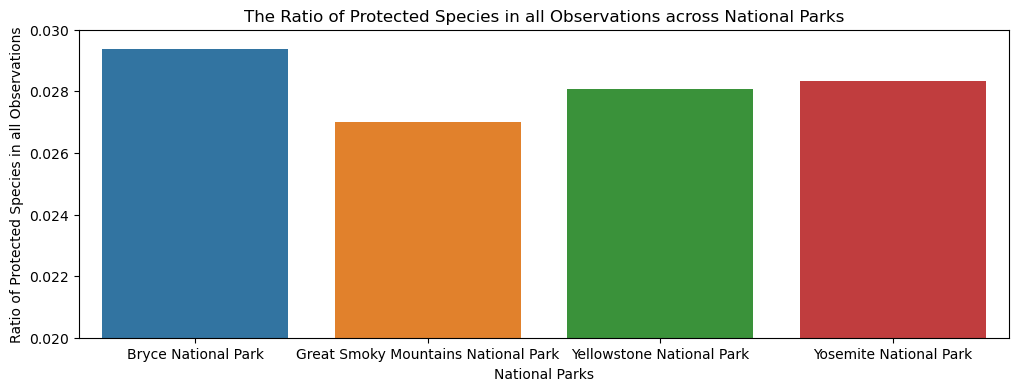

In [430]:
park_con_pro=pd.DataFrame()
park_con_pro=park_cat[park_cat['conservation_status']!= 'No Concern'].groupby('park_name')['observations'].agg(['sum']).reset_index()
park_con_pro.columns=['park','number_of_protected_species']
park_con_healthy=pd.DataFrame()
park_con_healthy=park_cat[park_cat['conservation_status']== 'No Concern'].groupby('park_name')['observations'].agg(['sum']).reset_index()
park_con_healthy.columns=['park','number_of_healthy_species']
park_con_diff=pd.merge(park_con_pro,park_con_healthy,how='inner',on='park')
park_con_diff['ratio_of_protected_species']=park_con_diff['number_of_protected_species']/park_con_diff[['number_of_protected_species','number_of_healthy_species']].sum(axis=1)
display(park_con_diff)

fig4=plt.figure(figsize=(12,4))
sns.barplot(data=park_con_diff,x='park',y='ratio_of_protected_species')
plt.xlabel('National Parks')
plt.ylabel('Ratio of Protected Species in all Observations')
plt.title('The Ratio of Protected Species in all Observations across National Parks')
plt.ylim(0.02,0.03)
plt.show()

**Despite there were more protected species spotted in Yellowstone National Park, it looks like Bryce National Park has the highest percentage of protected species observed**

The significance of the difference will be investigated in this section

In [393]:
contingency_table_2 = park_con_diff.iloc[:,1:3]
chi2,p_value,_,_=chi2_contingency(contingency_table_2)
print(chi2,p_value)

59.17298979164576 8.829012898880754e-13


So there is significant difference, but which pair of comparison does it lie in?

In [394]:
parks=observations['park_name'].unique()
for i in range(len(parks)):
    for j in range(i + 1, len(parks)):
        contingency_table_pairwise = park_con_diff[['number_of_protected_species', 'number_of_healthy_species']].loc[[i, j]]
        chi2, p, _, _ = chi2_contingency(contingency_table_pairwise)
        
        if p<0.05:
            print(f"Chi-square value for {parks[i]} vs {parks[j]}: {chi2}")
            print(f"P-value: {p}")

Chi-square value for Great Smoky Mountains National Park vs Yosemite National Park: 56.4427354603241
P-value: 5.785909124691115e-14
Chi-square value for Great Smoky Mountains National Park vs Bryce National Park: 27.77083685470699
P-value: 1.3656932240949637e-07
Chi-square value for Great Smoky Mountains National Park vs Yellowstone National Park: 14.637518824857047
P-value: 0.00013029462359066287
Chi-square value for Yosemite National Park vs Bryce National Park: 16.083766615316705
P-value: 6.060129626120777e-05
Chi-square value for Yosemite National Park vs Yellowstone National Park: 21.446685271211543
P-value: 3.6380438824173627e-06


**The result of Chi-square test shows us:**
- Great Smoky Mountains has significantly lower rate of protected species spotted.
- Bryce National Park has signifcantly higher percentage compared others except Yellowstone National Park.

Now we know the difference in total number and rate of protected species, what about individual conservation status?
To answer this question, we can start by looking at each park's observation in conservation statuses.

In [588]:
park_cat_group=park_cat.groupby(['park_name','conservation_status'])['observations'].sum().reset_index()
park_cat_total = park_cat_group.groupby('park_name')['observations'].agg(['sum']).reset_index()
park_cat_group = pd.merge(park_cat_group, park_cat_total, on='park_name')
park_cat_group['ratio_of_protected_species']=park_cat_group['observations']/park_cat_group['sum']
display(park_cat_group.pivot(index='park_name',columns='conservation_status', values='ratio_of_protected_species'))

conservation_status,Endangered,In Recovery,No Concern,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,0.000977,0.000613,0.970615,0.026861,0.000933
Great Smoky Mountains National Park,0.000828,0.000522,0.973011,0.024712,0.000927
Yellowstone National Park,0.000981,0.000560,0.971919,0.025621,0.000919
Yosemite National Park,0.000993,0.000613,0.971654,0.025845,0.000894


By eyballing, we can observe that Great Smoky Mountains National Park has the highest ratio of species with no concern and lowest ratio of endangered species. The following secion will examine the significance of difference across national parks.

In [354]:
from itertools import combinations

con_status=species_info['conservation_status'].unique()

for status in con_status:
    subset=park_cat_group[park_cat_group['conservation_status'] == status]
    park_combinations = list(combinations(subset['park_name'], 2))
    for park1, park2 in park_combinations:
        obs_park1=subset.loc[subset['park_name']==park1,'observations'].values[0]
        obs_park2=subset.loc[subset['park_name']==park2,'observations'].values[0]
        sum_park1=subset.loc[subset['park_name']==park1,'sum'].values[0]
        sum_park2=subset.loc[subset['park_name']==park2,'sum'].values[0]
        contingency_table2 = [[obs_park1, sum_park1-obs_park1], [obs_park2,sum_park2-obs_park2]]
        chi2, p, _, _ = chi2_contingency(contingency_table2)
        
        if p<0.05:
            print(f"Chi-square value for {park1} vs {park2} in conservation status of {status}: {chi2}")
            print(f"P-value: {p}")

Chi-square value for Bryce National Park vs Great Smoky Mountains National Park in conservation status of No Concern: 56.4427354603241
P-value: 5.785909124691115e-14
Chi-square value for Bryce National Park vs Yellowstone National Park in conservation status of No Concern: 27.77083685470699
P-value: 1.3656932240949637e-07
Chi-square value for Bryce National Park vs Yosemite National Park in conservation status of No Concern: 14.637518824857047
P-value: 0.00013029462359066287
Chi-square value for Great Smoky Mountains National Park vs Yellowstone National Park in conservation status of No Concern: 16.083766615316705
P-value: 6.060129626120777e-05
Chi-square value for Great Smoky Mountains National Park vs Yosemite National Park in conservation status of No Concern: 21.446685271211543
P-value: 3.6380438824173627e-06
Chi-square value for Bryce National Park vs Great Smoky Mountains National Park in conservation status of Species of Concern: 49.509363978203936
P-value: 1.974271347902114e-1

**Let's break it down by examine each conservation status:**
- Endangered: Great Smoky National Park has significantly the lowest ratio of endangered species observed compared to others.
- Species of Concern: Bryce National Park has the highest ratio of species of concern spotted with significant difference. Great Smoky National Park has the least percentage with significant difference.
- In Recovery: Great Smoky National Park has lower ratio of species in recovery recorded compared to Yosemite National Park.
- No Concern: Great Smoky National Park has the greatest percentage of unprotected species observed, whereas Bryce National Park has the smallest.

### 4. Identify species that potentially need protection.

**In this section, we will try to find out species that are currently labelled as 'No Concern', but could possibly be 'Species of Concern' in the future.**

Firstly, let's plot the observations of species by conservation status.

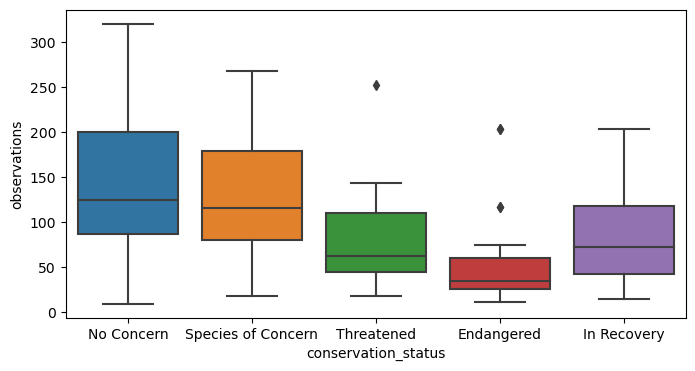

In [410]:
fig5=plt.figure(figsize=(8,4))
sns.boxplot(data=park_cat,x='conservation_status',y='observations')
plt.show()

As we can see, the lower whisker of 'No Concern' is actually lower than 'Species of Concern', indicating that some species despite categorize as 'No Concern', it might actually has lower probability to be spotted.

In order to find out unprotected species that has extremly low observations, we will use z-score with a threshold of -2 to determine it.

In [550]:
unprotected_low_obs=pd.DataFrame()
for park in parks:
    subset=park_cat.loc[(park_cat['park_name']==park) & (park_cat['conservation_status']=='No Concern')].copy()
    subset['z-score']=(subset['observations']-subset['observations'].mean())/subset['observations'].std()
    unprotected_low_obs = pd.concat([unprotected_low_obs,(subset.loc[subset['z-score'] <= -2])])

In [544]:
unprotected_low_obs_group=unprotected_low_obs.groupby(['park_name','category'])['scientific_name'].count().reset_index(name='count')

unprotected_low_obs_group_pivot=unprotected_low_obs_group.pivot(index='park_name',columns='category',values='count')
unprotected_low_obs_group_pivot['total']=unprotected_low_obs_group_pivot.sum(axis=1)
unprotected_low_obs_group_pivot
display(unprotected_low_obs_group_pivot)

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant,total
park_name,,,,,,,,
Bryce National Park,3.0,5.0,NaN,8.0,10.0,NaN,113.0,139.0
Great Smoky Mountains National Park,NaN,12.0,3.0,5.0,6.0,1.0,102.0,129.0
Yellowstone National Park,3.0,10.0,2.0,11.0,6.0,1.0,105.0,138.0
Yosemite National Park,2.0,12.0,3.0,3.0,4.0,3.0,99.0,126.0


**The result of z-score examination tells us:**
- Yosemite National Park has the least number of potential species of concern. 
- Vascular plants are the majority of potential species of concern.
- The list of potential species of concern is included in `unprotected_low_obs`.

## Conclusions
This project was aimed to make visulisation and inferential analysis about the various species located in the four National Parks.

The analysis of this project was dedicated to answer the following questions:
- What is the distribution of conservation status for species and category?
    - Most of the species in `species_info` are not in conservation (5,363 vs 179).
    - Most of the protected species are from the vascular plant category (n = 4,262), followed by bird (n = 488) and nonvascular plant (n = 333).
- Which cateogry of species has more protected species?
    - The bird category has the most number of protected species (n = 75) and mammals have the highest ratio (17%).
    - Both vascular plants and nonvascular plants have significantly lower ratio of species in conservation.
- Which National Park has more protected species?
    - Bryce National Park has the significantly highest ratio of total number of conserved species and species of concern. 
    - Great Smoky National Park has the least number of total protected species number, endangered species and species of concern observed in the last 7 days, making it the National Park that require the most attention for biodiversity maintenance.
- What are the species that can potentially be labelled as endangered species in the future?
    - Yosemite National Park has the most number of species that might become species of concern.
    - Vascular plants require the most additional attention to prevent them from turning into species of concern.

## Further Research
The dataset we have only include observations from the last 7 days, it would be more meaningful if we have data from the last 30 days or more with timestamp. That way we can observe changes in number of conserved species. In addition, as National Parks have different size, it would be better if size of National Park is given so as to analyze density of species.